In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# Load the image
image_path = '/home/eaguiraud/Documents/34269_computer_imaging_and_spectroscopy/2024_07_11_cis/34269_AWB/Wb_girl_neutral.jpg'  # replace with actual path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [12]:
# Estimate the white point using Retinex theory (average of the brightest pixels)
def estimate_white_point(image):
    # Flatten the image and sort by brightness
    flat_image = image.reshape(-1, 3)
    brightest_pixels = flat_image[np.sum(flat_image, axis=1).argsort()[-100:]]
    
    # Estimate white point as the mean of the brightest pixels
    white_point = np.mean(brightest_pixels, axis=0)
    return white_point

white_point_est = estimate_white_point(image)
print(f"Estimated white point: {white_point_est}")

Estimated white point: [241.1  242.35 245.04]


In [13]:
def apply_cat02(image, adaptation_matrix):
    # Convert the image to linear RGB
    linear_rgb = np.dot(image, M_inv_CAT02.T)
    
    # Apply the adaptation matrix
    adapted_rgb = np.dot(linear_rgb, adaptation_matrix)
    
    # Convert back to sRGB
    sRGB = np.dot(adapted_rgb, M_CAT02.T)
    
    # Clip the values to the valid range
    sRGB = np.clip(sRGB, 0, 255).astype(np.uint8)
    return sRGB

In [16]:


# Define D65 white point
D65 = np.array([95.047, 100.000, 108.883])

# Calculate the adaptation matrix
adaptation_matrix = np.diag(D65 / white_point_est)

# CAT02 transformation matrices
M_CAT02 = np.array([[ 0.7328,  0.4296, -0.1624],
                    [-0.7036,  1.6975,  0.0061],
                    [ 0.0030,  0.0136,  0.9834]])

M_inv_CAT02 = np.linalg.inv(M_CAT02)

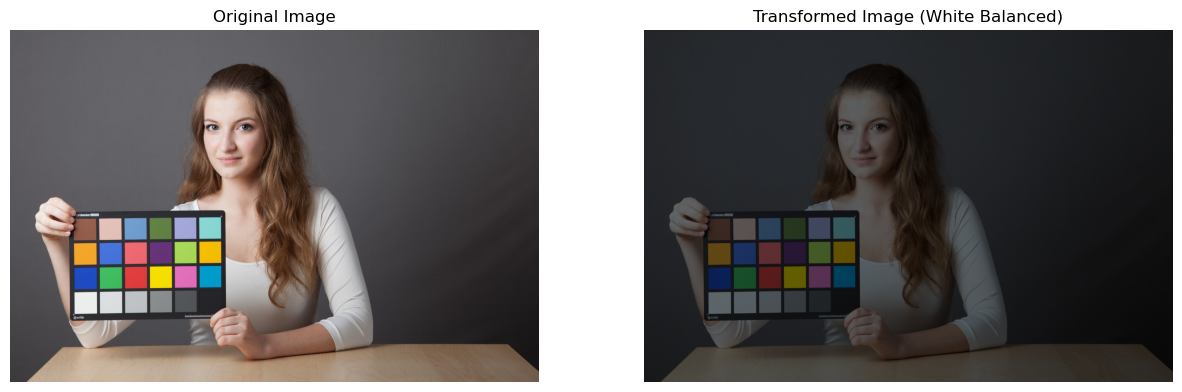

In [18]:
# Apply the CAT02 transformation
transformed_image = apply_cat02(image, adaptation_matrix)

# Display the original and transformed images
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Transformed Image (White Balanced)')
plt.imshow(transformed_image)
plt.axis('off')

plt.show()

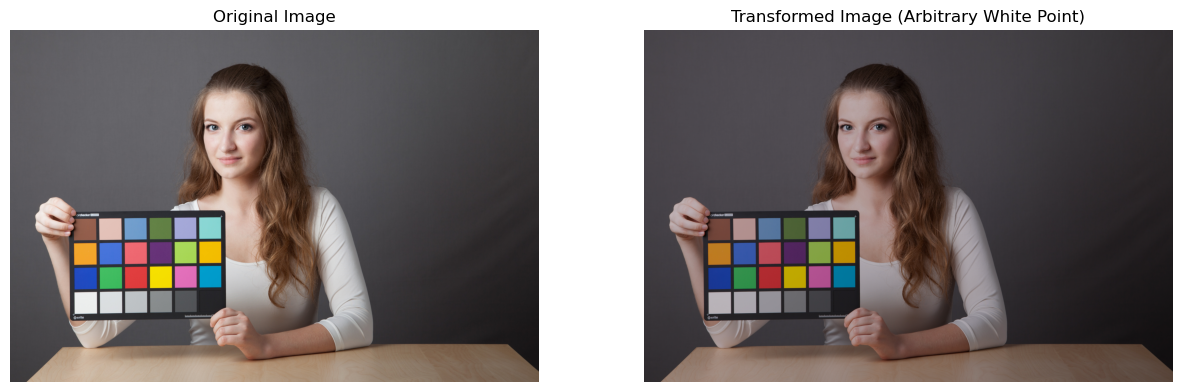

In [19]:
# Step 4: Try with arbitrary input White points
# For example, using a white point of [120, 130, 140]
arbitrary_white_point = np.array([120, 130, 140])
adaptation_matrix_arbitrary = np.diag(D65 / arbitrary_white_point)
transformed_image_arbitrary = apply_cat02(image, adaptation_matrix_arbitrary)

# Display the image with arbitrary white point
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Transformed Image (Arbitrary White Point)')
plt.imshow(transformed_image_arbitrary)
plt.axis('off')

plt.show()